Dataset:

https://www.kaggle.com/openfoodfacts/world-food-facts

### Import Dataset and libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_data = pd.read_table("/kaggle/input/world-food-facts/en.openfoodfacts.org.products.tsv",delimiter='\t',low_memory=False)

In [2]:
food_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Searching for manufacturers which use plastic stuffs for packing food
df = food_data[['manufacturing_places','packaging_tags']][(food_data['packaging_tags']=='plastique')|(food_data['packaging_tags']=='plastic')]

In [5]:
df = df.dropna()
print(df.head(20))

                                    manufacturing_places packaging_tags
197                                             Thailand        plastic
470                                          Royaume Uni      plastique
696                                          Royaume-Uni      plastique
1392                                              Canada        plastic
12997                                              china        plastic
13461                                     United Kingdom        plastic
16019                                     United Kingdom        plastic
17574                                                USA        plastic
21764            Crèmerie Soignon,Poitou-Charente,France        plastic
22688                                        Royaume-Uni      plastique
23901                                                USA        plastic
23902                                    Plano,Texas,USA        plastic
29362                                      United States        

to analyze the worldwide plastics users let’s sort the countries according to their usage of plastic to pack food products:

In [6]:
# calculating which country uses what extent of plastic stuffs
data = df['manufacturing_places'].value_counts(sort=True,dropna=False)
print(data.head(10))

manufacturing_places
France            296
Australia         206
MADAGASCAR         52
Belgique           48
Italie             47
Suisse             39
Serbia             38
Allemagne          28
Espagne            25
United Kingdom     23
Name: count, dtype: int64


The output shows that France is the biggest user of plastic. To get more detailed insights, let’s prepare the data and visualize it in the form of a bar plot.

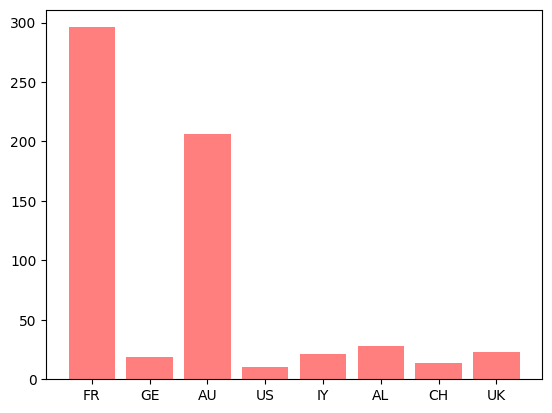

In [8]:
#Defining a new column stating the extent of usage of plastic as 1
df['value']=1

def plast(country):
    return df[df.manufacturing_places == country].value.sum()
#plastic extent for some of the highest users
fr_plast=plast("France")
ge_plast=plast('Germany')
au_plast=plast('Australia')
us_plast=plast('United States')
iy_plast=plast('Italy')
al_plast=plast('Allemagne')
ch_plast=plast('China')
uk_plast=plast('United Kingdom')

countries = ['FR','GE','AU','US','IY','AL','CH','UK']
plastic=[fr_plast,ge_plast,au_plast,us_plast,iy_plast,al_plast,ch_plast,uk_plast]
ypos = np.arange(len(countries))
plt.bar(ypos,plastic,align='center',alpha=0.5,facecolor='r')
plt.xticks(ypos, countries)
plt.show()

Source:

https://thecleverprogrammer.com/2020/11/09/plastic-users-analysis-with-python/